In [1]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

n=$((\sigma*Za) / \Delta)^2$

In [9]:
n = int((15*1.96/3)**2)
n

96

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [15]:
a = 0.05
x = 130
n = 25
sigma = 15
Z_a = 2.241
delta = sigma/np.sqrt(n)*Z_a
L = int(delta*2)
print("L = ", L)

L =  13


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [16]:
import scipy.stats as stats

population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

In [17]:
t, p = stats.ttest_ind(population_men, population_women)
t, p

(1.285274492105567, 0.19869640758001392)

Мы получили маленькое значение t-value и большое р-value, это говорит о том, что различие между нашими выборками статистически не значимо.

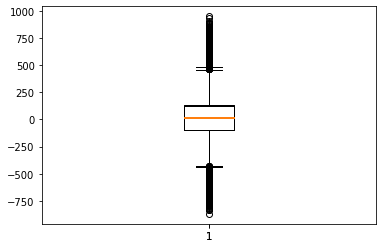

In [25]:
plt.boxplot(population_men); #Выборка a
plt.boxplot(population_women);  #Выборка b

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [32]:
n = int((150*1.96/50)**2)
n

34

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [27]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [31]:
import scipy.stats as stats
# Учтите, что у тестов, в том чилсле и точного теста Фишера под нулевой гипотезой подразумевается 
# случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations)#Возможно пригодится эта функция.

In [30]:
pvalue

0.35417955365927367

pvalue 35%, нельзя отвергать нулевую гипотезу

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [33]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

def mean_confidence_interval(data, confidence = 0.95):
    n = len(data)
    m = np.mean(data)
    alfa = 1. - confidence
    delta = stats.t.ppf(1. - alfa / 2., n-1)
    return m-delta, m, m+delta

In [34]:
mean_confidence_interval(data, 0.9)

(4.937647177800775, 6.628571428571429, 8.319495679342083)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [35]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

#Ваш код:

In [41]:
# t-test
t , p  = stats.ttest_ind(data_1, data_2)
t, p

(7.35744682757447, 2.1159475572725764e-11)

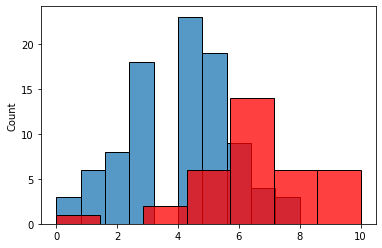

In [53]:
sns.histplot(data_2 );
sns.histplot(data_1, color = 'red');

Низкий p-value и графики говорят о том, что наши выборки достаточно сильно отличаются, хоть и имеют пересечения.

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

### Ваши выводы:

p-value < 5% можно гвоорить об отвержении нулевой гипотехыы и принятии альтернативной (не нормальное распределение). 

Вероятность получить нормальное распределение 3%

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [54]:
np.random.seed(11)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test

In [55]:
stats.ttest_ind(a=A, b=B, equal_var=False)

Ttest_indResult(statistic=-1.95300880485141, pvalue=0.051284961272800134)

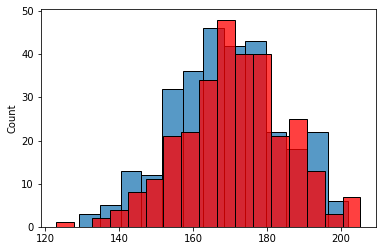

In [56]:
sns.histplot(A);
sns.histplot(B, color = 'red');

p-value больше нашего уровня значимости, следовательно, нельзя отвергать нулевую гипотезу о том, что наши результаты получились случайно и различия статистически не значимы